In [ ]:
#Lab | Customer Analysis Round 2
#For this lab, we still keep using the marketing_customer_analysis.csv file. You can find the file in the Data folder.

#Get the data
#Use the same jupyter file from the last lab, Customer Analysis Round
#Complete the following tasks:
#Show DataFrame info.

#Describe DataFrame.

#Show a plot of the total number of responses.

#Show a plot of the response rate by the sales channel.

#Show a plot of the response rate by the total claim amount.

#Show a plot of the response rate by income.

#Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

#Now we will try to check the distributions of the numerical variables visually

#Use seaborn library to construct distribution plots for the numerical variables
#Use Matplotlib to construct histograms
#For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

#Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

datax = pd.read_csv('marketing_customer_analysis.csv')
datax

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [2]:
#Show DataFrame info.
datax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [3]:
#Describe DataFrame.
datax.describe()

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [4]:
cols = []
for i in range(len(datax.columns)):
    cols.append(datax.columns[i].lower())
datax.columns = cols

In [5]:
datax

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [6]:
datax.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
datax

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [7]:
#Nans

round(datax.isna().sum()/len(datax),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(datax.isna().sum()/len(datax),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,unnamed:_0,0.00
1,customer,0.00
2,state,5.78
3,customer_lifetime_value,0.00
4,response,5.78
5,coverage,0.00
6,education,0.00
7,effective_to_date,0.00
8,employmentstatus,0.00
9,gender,0.00


In [8]:
columns_drop = nulls_df[nulls_df['percent_nulls']>3]['header_name']  # dummy case with 3
print(columns_drop.values)

['state' 'response' 'months_since_last_claim' 'number_of_open_complaints'
 'vehicle_class' 'vehicle_size' 'vehicle_type']


In [9]:
datax = datax.drop(["unnamed:_0", "vehicle_type"], axis=1)
datax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10279 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10279 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

In [10]:
datax=datax.drop_duplicates()
datax

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [11]:
datax=datax.dropna()
datax

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,...,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,...,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,...,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize


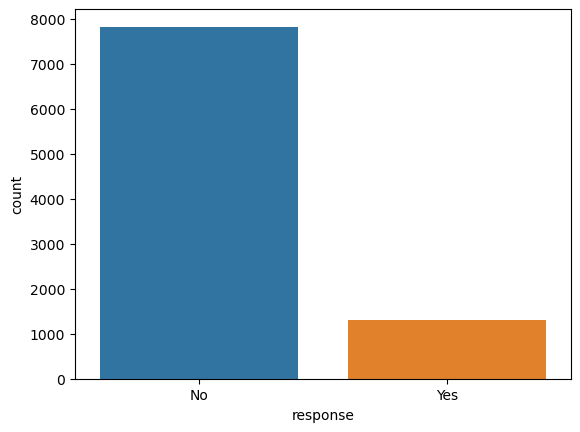

In [12]:
#Show a plot of the total number of responses.
sns.countplot(x=datax.response);

In [13]:
datax["num_response"] = np.where(datax["response"] == "No", 0, 1)
datax

C:\Users\matte\AppData\Local\Temp\ipykernel_13896\4064387012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax["num_response"] = np.where(datax["response"] == "No", 0, 1)


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,num_response
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,0
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,0
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,0
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,0
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,0
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,0
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,0


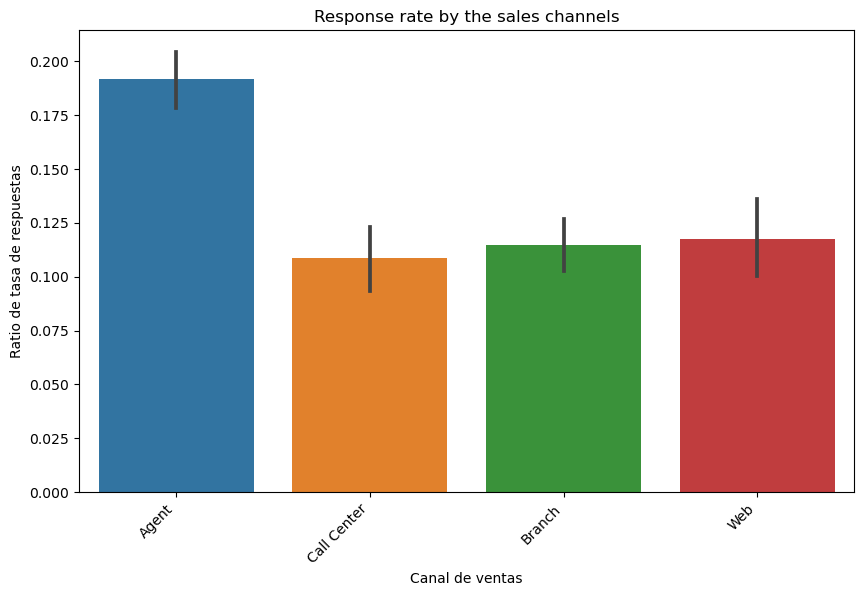

In [14]:
#Show a plot of the response rate by the sales channel.

plt.figure(figsize=(10, 6))
sns.barplot(x=datax["sales_channel"], y=datax["num_response"])
plt.title('Response rate by the sales channels')
plt.xlabel('Canal de ventas')
plt.ylabel('Ratio de tasa de respuestas')
plt.xticks(rotation=45, ha='right')
plt.show()

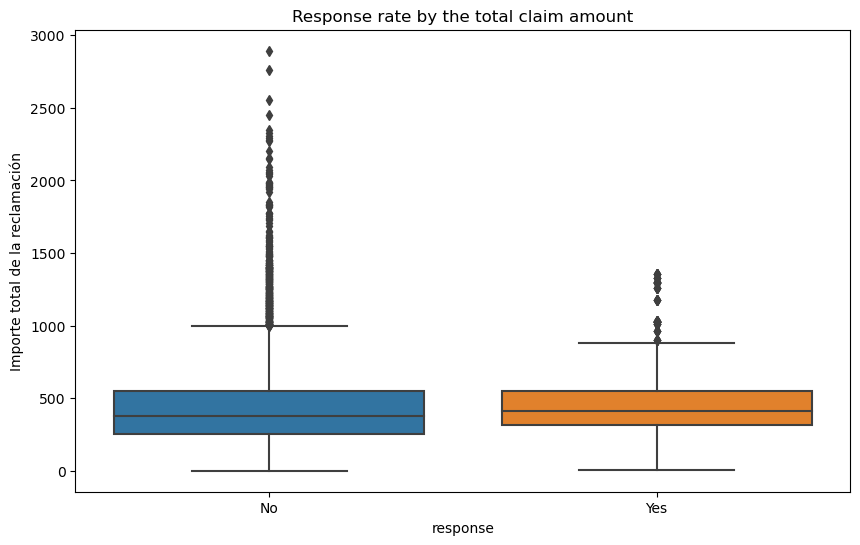

In [15]:
#Show a plot of the response rate by the total claim amount.

plt.figure(figsize=(10, 6))
sns.boxplot(x='response', y='total_claim_amount', data=datax)
plt.title('Response rate by the total claim amount')
plt.ylabel('Importe total de la reclamación')
plt.xticks([0, 1], ['No', 'Yes'])  # Etiquetas para el eje x
plt.show()

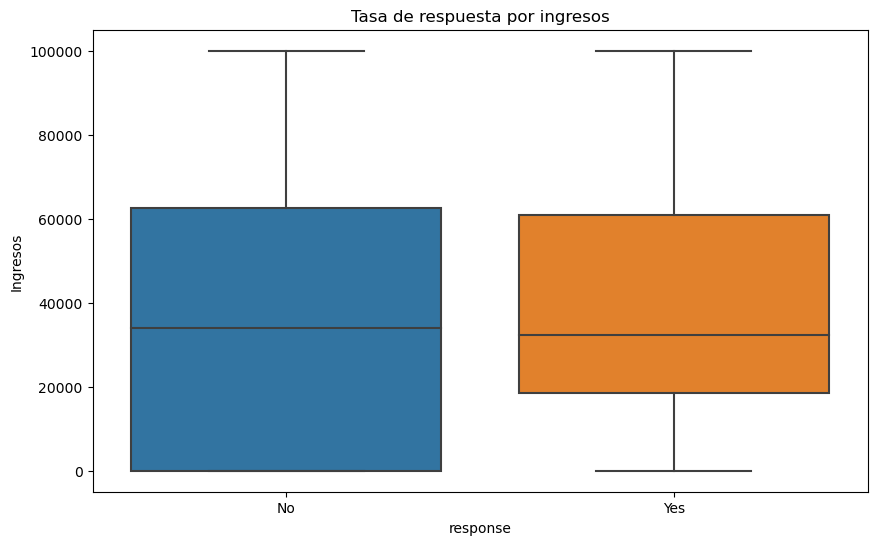

In [16]:
#Show a plot of the response rate by income.

plt.figure(figsize=(10, 6))
sns.boxplot(x='response', y='income', data=datax)
plt.title('Tasa de respuesta por ingresos')
plt.ylabel('Ingresos')
plt.xticks([0, 1], ['No', 'Yes'])  # Etiquetas para el eje x
plt.show()

In [17]:
#Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
datax.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
num_response    

In [18]:
numerical_columns = datax.select_dtypes(include=['int', 'float']).columns
categorical_columns = datax.select_dtypes(include=['object']).columns

# Imprimir los nombres de las columnas numéricas y categóricas
print("Columnas numéricas:")
print(numerical_columns)
print("\nColumnas categóricas:")
print(categorical_columns)

Columnas numéricas:
Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'num_response'],
      dtype='object')

Columnas categóricas:
Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')


In [19]:
numerical_df = datax[numerical_columns]
categorical_df = datax[categorical_columns]

In [20]:
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,num_response
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,0
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,0
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,0
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107,0
...,...,...,...,...,...,...,...,...,...
10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000,0
10904,19228.463620,0,187,14.0,32,0.0,2,897.600000,0
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,0
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,0


In [22]:
numerical_df.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
total_claim_amount               float64
num_response                       int32
dtype: object

In [23]:
categorical_df

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
6,IW72280,California,No,Basic,Doctor,2/14/11,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,No,Basic,College,1/7/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize
10904,QI63521,Nevada,No,Basic,High School or Below,2/24/11,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize


C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


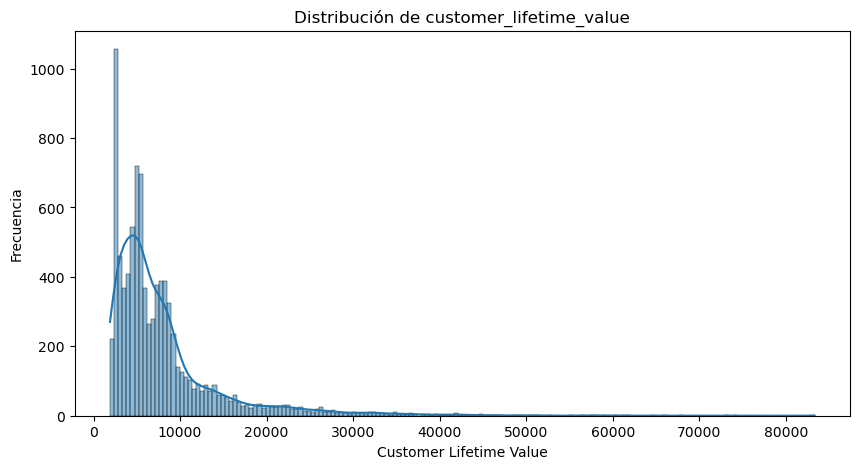

In [24]:
#Now we will try to check the distributions of the numerical variables visually

# Ejemplo para 'customer_lifetime_value'
plt.figure(figsize=(10, 5))
sns.histplot(numerical_df['customer_lifetime_value'], kde=True)
plt.title('Distribución de customer_lifetime_value')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


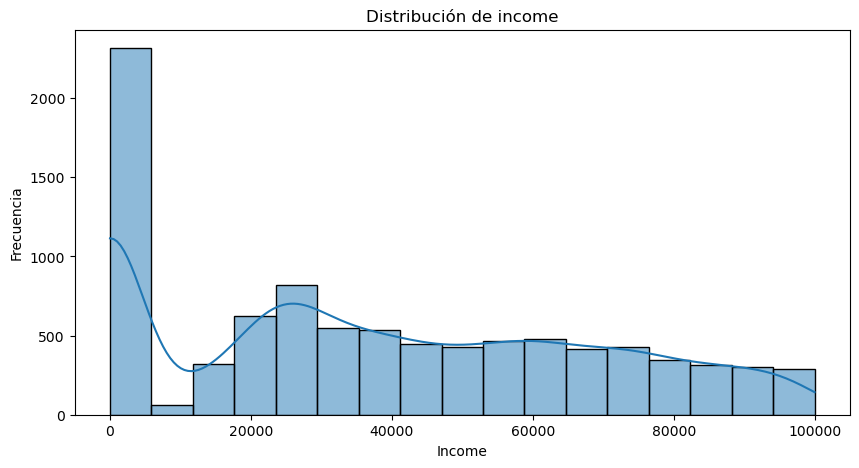

In [25]:
# Ejemplo para 'income'
plt.figure(figsize=(10, 5))
sns.histplot(numerical_df['income'], kde=True)
plt.title('Distribución de income')
plt.xlabel('Income')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


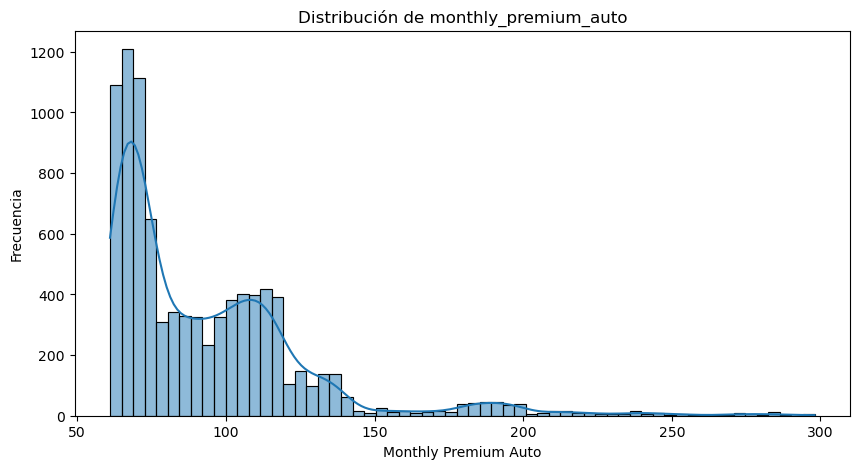

In [26]:
# Ejemplo para 'monthly_premium_auto'
plt.figure(figsize=(10, 5))
sns.histplot(numerical_df['monthly_premium_auto'], kde=True)
plt.title('Distribución de monthly_premium_auto')
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


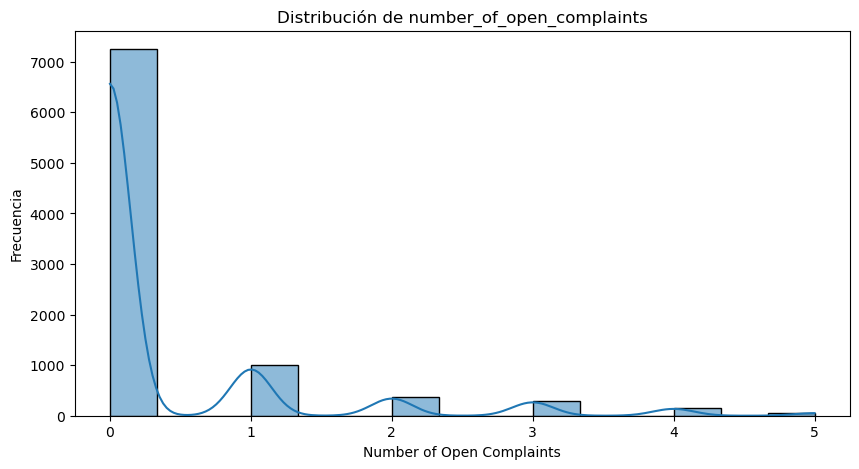

In [27]:
# Ejemplo para 'number_of_open_complaints'
plt.figure(figsize=(10, 5))
sns.histplot(numerical_df['number_of_open_complaints'], kde=True)
plt.title('Distribución de number_of_open_complaints')
plt.xlabel('Number of Open Complaints')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


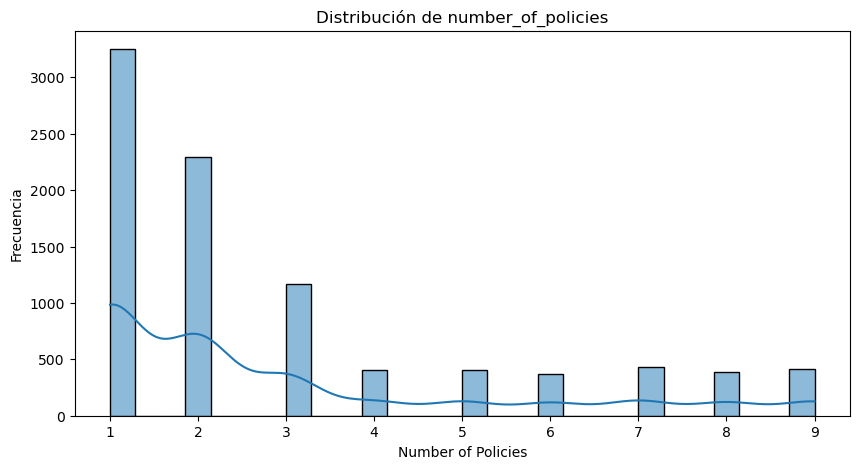

In [28]:
# Ejemplo para 'number_of_policies'
plt.figure(figsize=(10, 5))
sns.histplot(numerical_df['number_of_policies'], kde=True)
plt.title('Distribución de number_of_policies')
plt.xlabel('Number of Policies')
plt.ylabel('Frecuencia')
plt.show()

In [30]:
#For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
numerical_df[['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'num_response']].corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,num_response
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.008930
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.011932
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.010966
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.016597
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.002952
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.009881
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,-0.020891
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.016877
num_response,-0.008930,0.011932,0.010966,-0.016597,0.002952,-0.009881,-0.020891,0.016877,1.000000


In [ ]:
#Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features.